## **Code : Report results**
- Writer : Donghyeon Kim
- Date : 2022.09.25.
- 대상 : 통합 데이터(태양광 사용 3kW & 미사용)
- 주택형태 : 단독주택

<hr>

## **Prior Settings**

In [1]:
# 라이브러리 설정
import os
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 사용자 함수 호출 #
# get_project_root : 파일의 상위-상위 경로 호출
# get_name_root : 모든 사용자 이름 호출
# get_name_root_use : 태양광 사용자 이름 호출
# get_name_root_use2 : 태양광 사용자 이름 호출(단독주택 한정)
# get_name_root_use3 : 태양광 사용자 이름 호출(단독주택 + 3kW 한정)
# get_name_root_not : 태양광 미사용자 이름 호출
# get_name_root_not2 : 태양광 미사용자 이름 호출(단독주택 한정)

# kw_dict : kW Dictionary
# kw_value_dict : kW value Dictionary

from pack_utils import get_project_root, get_name_root, get_name_root_use, kw_dict, kw_value_dict
from pack_utils import get_name_root_use2
from pack_utils import get_name_root_use3

<hr>

### **Data**
- 태양광 사용 가구 : 단독주택 + 3kW 한정
  - 3kW : 8가구
- 태양광 미사용 가구 : 단독주택 한정
  - 총 18가구

#### 1) Hour(1시간 단위)

In [3]:
# All Data
root = get_project_root()
folder_root = os.path.join(root, 'data_merge_wt_f')
file_name = os.path.join(folder_root, 'all_concat_hour_3kw.xlsx')
df_all_hour = pd.read_excel(file_name)

# Filtering
# (1) Using Solar
df_all_hour_use = df_all_hour[df_all_hour.type == 'use']

# (2) Not Using Solar
df_all_hour_not = df_all_hour[df_all_hour.type == 'not']

In [4]:
df_all_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244432 entries, 0 to 244431
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   가구번호                    244432 non-null  int64  
 1   연도                      244432 non-null  int64  
 2   월                       244432 non-null  int64  
 3   일                       244432 non-null  int64  
 4   시간                      244432 non-null  int64  
 5   설비용량(kW)                78276 non-null   object 
 6   발전량(kWh)                78276 non-null   float64
 7   전력소비량(kWh)              244432 non-null  float64
 8   수전전력량(kWh)              244432 non-null  float64
 9   잉여전력량(kWh)              78276 non-null   float64
 10  잉여전력량/발전량               38468 non-null   float64
 11  자가소비율                   78275 non-null   float64
 12  자가공급률                   78276 non-null   float64
 13  temperature             244432 non-null  float64
 14  uws_10m             

#### 2) Day(1일 단위)

In [5]:
# All Data
root = get_project_root()
folder_root = os.path.join(root, 'data_merge_wt_f')
file_name2 = os.path.join(folder_root, 'all_concat_day_3kw.xlsx')
df_all_day = pd.read_excel(file_name2)

# Filtering
# (1) Using Solar
df_all_day_use = df_all_day[df_all_day.type == 'use']

# (2) Not Using Solar
df_all_day_not = df_all_day[df_all_day.type == 'not']

In [6]:
df_all_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10545 entries, 0 to 10544
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   가구번호        10545 non-null  int64  
 1   연도          10545 non-null  int64  
 2   월           10545 non-null  int64  
 3   일           10545 non-null  int64  
 4   설비용량(kW)    3343 non-null   object 
 5   발전량(kWh)    3343 non-null   float64
 6   발전시간        3343 non-null   float64
 7   이용률         3343 non-null   float64
 8   전력소비량(kWh)  10545 non-null  float64
 9   수전전력량(kWh)  10545 non-null  float64
 10  잉여전력량(kWh)  3343 non-null   float64
 11  잉여전력량/발전량   3340 non-null   float64
 12  자가소비율       3340 non-null   float64
 13  자가공급률       3343 non-null   float64
 14  type        10545 non-null  object 
 15  owner       10545 non-null  object 
 16  ym          10545 non-null  object 
dtypes: float64(9), int64(4), object(4)
memory usage: 1.4+ MB


<hr>

## **Summary statistics & Graphs**

### **1. 월별 전력 소비량**
- 태양광 사용 가구
- 태양광 미사용 가구

In [7]:
# Summary Statistics #
# Result Dictionary
result = {}
result['설치가구(A)'] = []
result['미설치가구(B)'] = []
result['A/B'] = []

# Fill Dictionary
date_list = ['2021/4', '2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3']

for i in range(len(date_list)):
    # 1) Year/Month 필터링
    df_all_hour_use_f = df_all_hour_use[df_all_hour_use.ym == date_list[i]]
    df_all_hour_not_f = df_all_hour_not[df_all_hour_not.ym == date_list[i]]
    
    # 2) 값 합산
    use_consum = np.sum(df_all_hour_use_f['전력소비량(kWh)'])
    not_consum = np.sum(df_all_hour_not_f['전력소비량(kWh)'])
    
    # 3) 평균 구하기
    use_consum_mean = round(use_consum / (len(df_all_hour_use_f.owner.unique())), 1)
    not_consum_mean = round(not_consum / (len(df_all_hour_not_f.owner.unique())), 1)
    calc = round(use_consum_mean / not_consum_mean, 2)
    
    # 4) 값 넣기
    result['설치가구(A)'].append(use_consum_mean)
    result['미설치가구(B)'].append(not_consum_mean)
    result['A/B'].append(calc)
    
result = pd.DataFrame(result)
result.index = date_list
result

,설치가구(A),미설치가구(B),A/B
2021/4,352.1,232.8,1.51
2021/5,347.9,238.2,1.46
2021/6,334.8,232.0,1.44
2021/7,484.2,336.2,1.44
2021/8,471.6,320.2,1.47
2021/9,366.8,267.8,1.37
2021/10,381.6,242.8,1.57
2021/11,404.5,257.7,1.57
2021/12,447.9,291.7,1.54
2022/1,521.9,309.9,1.68


Line Plot 시작
Line Plot 종료


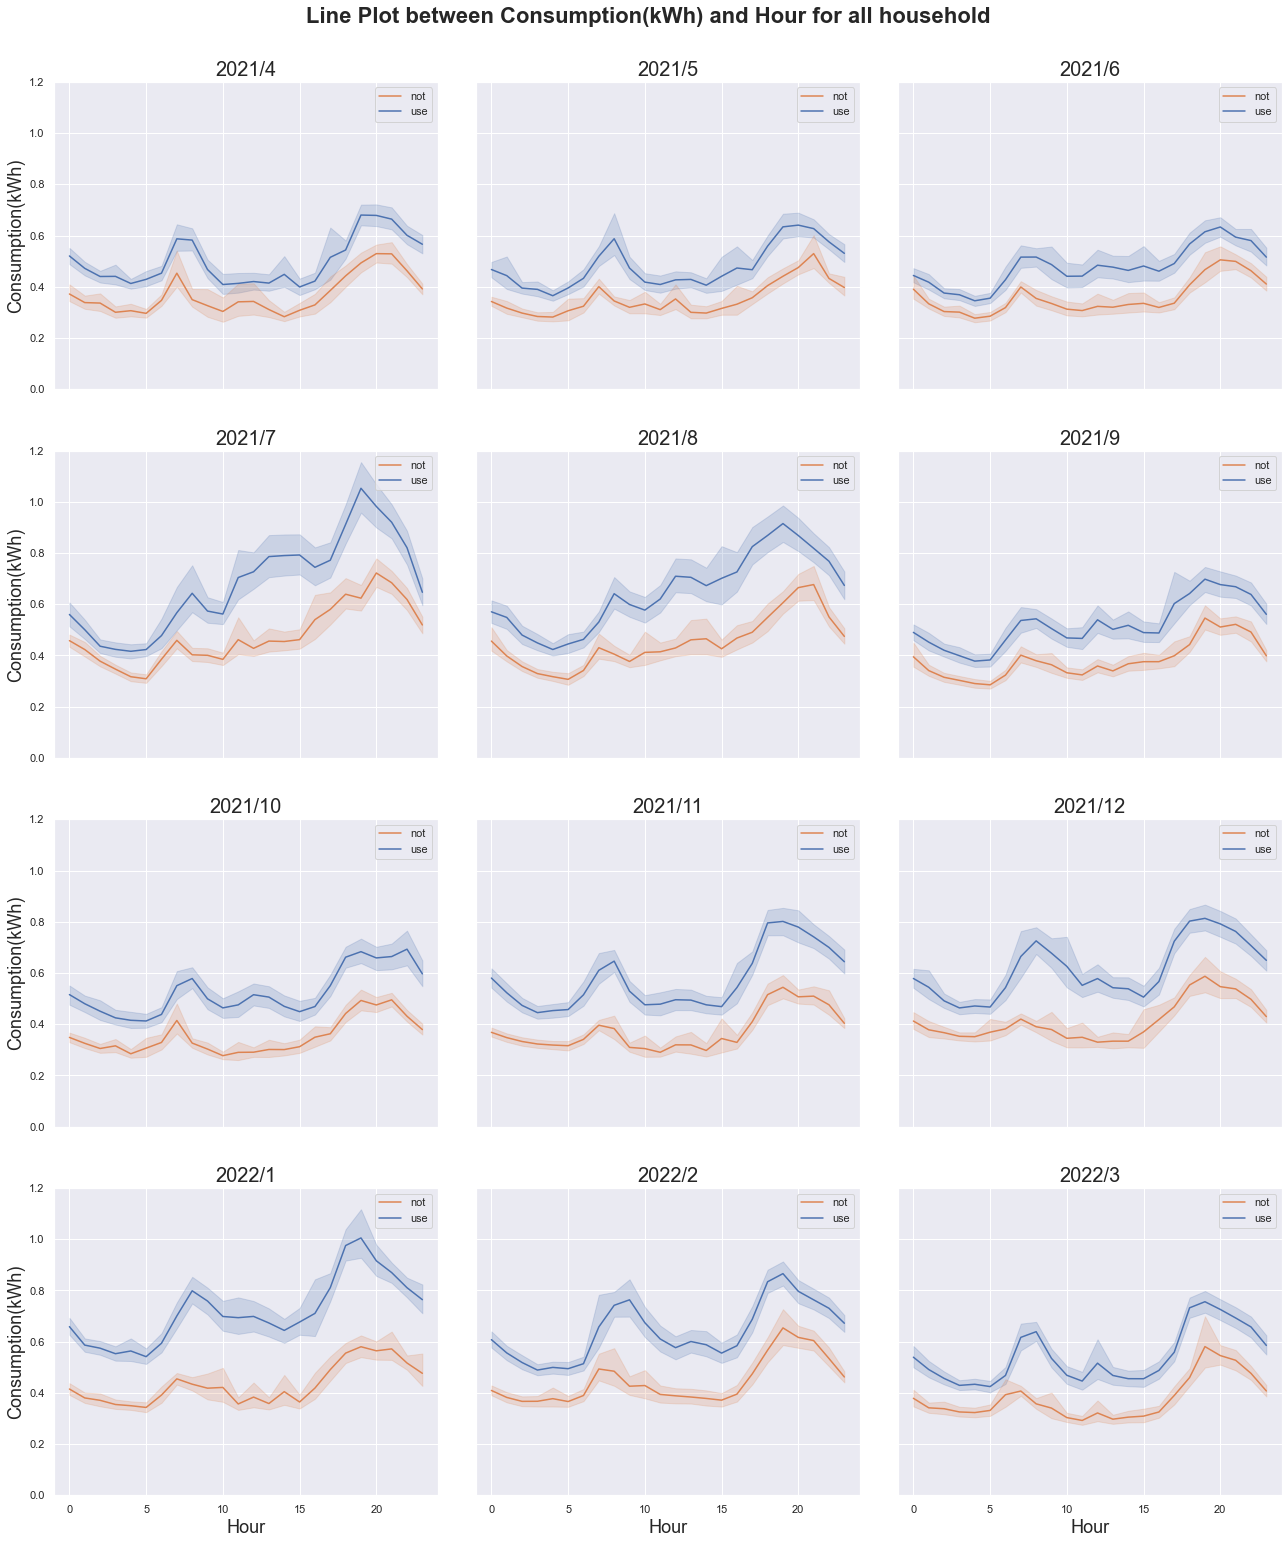

In [8]:
# Graph #
data_x = '시간'
data_y = '전력소비량(kWh)'
x_label = 'Hour'
y_label = 'Consumption(kWh)'
x_lim1 = -1.0
x_lim2 = 24.0
y_lim1 = 0.0
y_lim2 = 1.2

print('Line Plot 시작')

# 날짜 필터링 : 2021/4 ~ 2022/3
date_list = ['2021/4', '2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3']
    
sns.set(rc={'figure.figsize':(22, 26)})
plt.suptitle(f'Line Plot between {y_label} and {x_label} for all household',
             y=0.92, fontsize=22, fontweight='bold')
    
for i in range(len(date_list)):
    df_all_filter = df_all_hour[df_all_hour.ym == date_list[i]]
        
    if i in [1, 2, 4, 5, 7, 8]: # x,y축 label 제거
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.xlim(x_lim1, x_lim2)
        plt.ylim(y_lim1, y_lim2)
        axp = sns.lineplot(x=data_x, y=data_y, hue='type', data=df_all_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        axp.set(xlabel=None)
        axp.set(ylabel=None)
        axp.axes.xaxis.set_ticklabels([])
        axp.axes.yaxis.set_ticklabels([])
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)
    elif i in [0, 3, 6]: # x축 label만 제거
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.xlim(x_lim1, x_lim2)
        plt.ylim(y_lim1, y_lim2)
        axp = sns.lineplot(x=data_x, y=data_y, hue='type', data=df_all_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        axp.set(xlabel=None)
        plt.ylabel(y_label, fontsize=18)
        axp.axes.xaxis.set_ticklabels([])
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)
    elif i in [10, 11]: # y축 label만 제거
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.xlim(x_lim1, x_lim2)
        plt.ylim(y_lim1, y_lim2)
        axp = sns.lineplot(x=data_x, y=data_y, hue='type', data=df_all_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        plt.xlabel(x_label, fontsize=18)
        axp.set(ylabel=None)
        axp.axes.yaxis.set_ticklabels([])
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)
    else:
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.xlim(x_lim1, x_lim2)
        plt.ylim(y_lim1, y_lim2)
        axp = sns.lineplot(x=data_x, y=data_y, hue='type', data=df_all_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        plt.xlabel(x_label, fontsize=18)
        plt.ylabel(y_label, fontsize=18)
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)

print('Line Plot 종료')

<hr>

### **2. 월별 태양광 발전량**
- 태양광 사용 가구(이용률, 발전시간)

In [9]:
# Summary Statistics #
# Result Dictionary
result = {}
result['이용률(%)'] = []
result['발전시간(h)'] = []

# Fill Dictionary
date_list = ['2021/4', '2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3']

for i in range(len(date_list)):
    # 1) Year/Month 필터링
    df_all_day_use_f = df_all_day_use[df_all_day_use.ym == date_list[i]]
    
    # 2) 값 합산
    use_rate = np.sum(df_all_day_use_f['이용률'])
    use_hour = np.sum(df_all_day_use_f['발전시간'])
    
    # 3) 평균 구하기
    use_rate_mean = round(use_rate / len(df_all_day_use_f), 2)
    use_hour_mean = round(use_hour / len(df_all_day_use_f), 2)
    
    # 4) 값 넣기
    result['이용률(%)'].append(use_rate_mean)
    result['발전시간(h)'].append(use_hour_mean)
    
result = pd.DataFrame(result)
result.index = date_list
result

,이용률(%),발전시간(h)
2021/4,18.66,4.48
2021/5,16.61,3.99
2021/6,16.81,4.04
2021/7,16.13,3.87
2021/8,12.89,3.09
2021/9,13.49,3.24
2021/10,14.38,3.45
2021/11,12.03,2.89
2021/12,11.47,2.75
2022/1,13.01,3.12


Line Plot 시작
Line Plot 종료


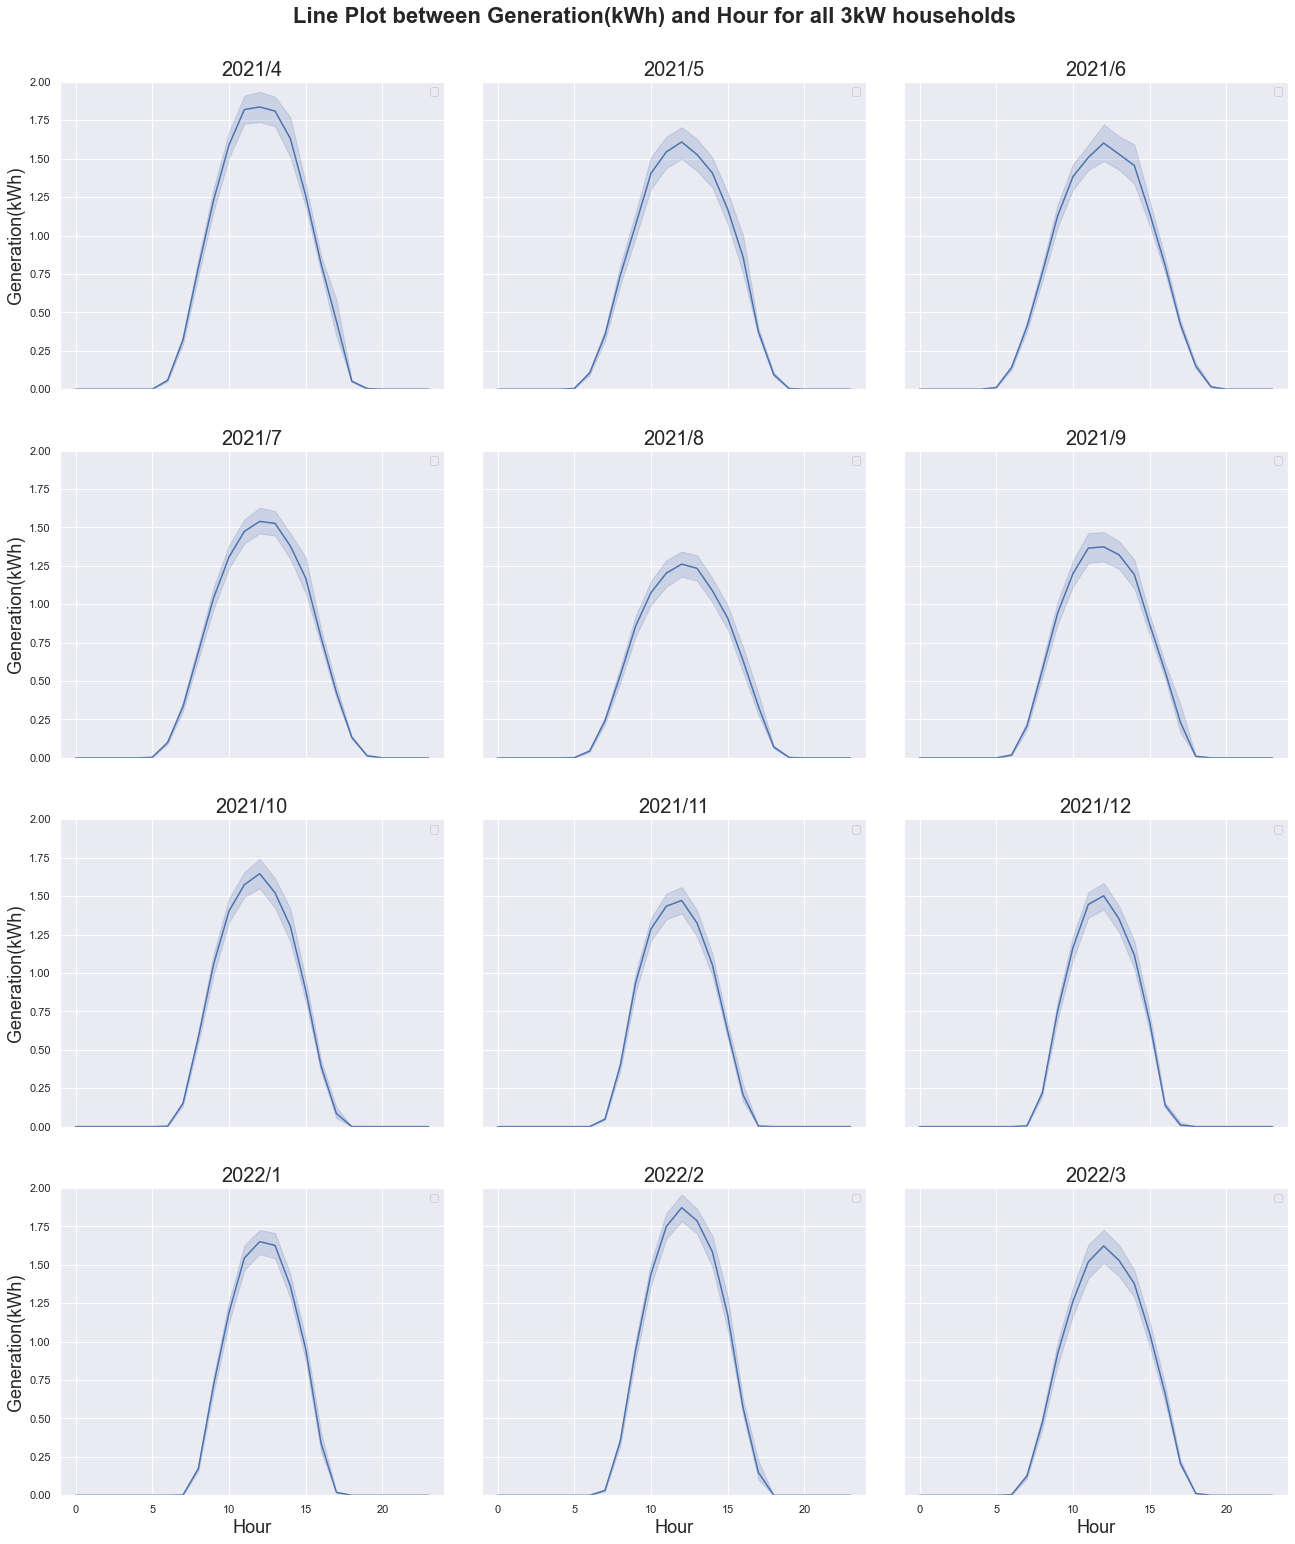

In [10]:
# Graph #
data_x = '시간'
data_y = '발전량(kWh)'
x_label = 'Hour'
y_label = 'Generation(kWh)'
x_lim1 = -1.0
x_lim2 = 24.0
y_lim1 = 0.0
y_lim2 = 2.0

print('Line Plot 시작')

# 날짜 필터링 : 2021/4 ~ 2022/3
date_list = ['2021/4', '2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3']
    
sns.set(rc={'figure.figsize':(22, 26)})
plt.suptitle(f'Line Plot between {y_label} and {x_label} for all 3kW households',
             y=0.92, fontsize=22, fontweight='bold')
    
for i in range(len(date_list)):
    df_all_hour_use_f = df_all_hour_use[df_all_hour_use.ym == date_list[i]]
        
    if i in [1, 2, 4, 5, 7, 8]: # x,y축 label 제거
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.xlim(x_lim1, x_lim2)
        plt.ylim(y_lim1, y_lim2)
        axp = sns.lineplot(x=data_x, y=data_y, data=df_all_hour_use_f)
        plt.title(f'{date_list[i]}', fontsize=20)
        axp.set(xlabel=None)
        axp.set(ylabel=None)
        axp.axes.xaxis.set_ticklabels([])
        axp.axes.yaxis.set_ticklabels([])
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)
    elif i in [0, 3, 6]: # x축 label만 제거
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.xlim(x_lim1, x_lim2)
        plt.ylim(y_lim1, y_lim2)
        axp = sns.lineplot(x=data_x, y=data_y, data=df_all_hour_use_f)
        plt.title(f'{date_list[i]}', fontsize=20)
        axp.set(xlabel=None)
        plt.ylabel(y_label, fontsize=18)
        axp.axes.xaxis.set_ticklabels([])
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)
    elif i in [10, 11]: # y축 label만 제거
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.xlim(x_lim1, x_lim2)
        plt.ylim(y_lim1, y_lim2)
        axp = sns.lineplot(x=data_x, y=data_y, data=df_all_hour_use_f)
        plt.title(f'{date_list[i]}', fontsize=20)
        plt.xlabel(x_label, fontsize=18)
        axp.set(ylabel=None)
        axp.axes.yaxis.set_ticklabels([])
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)
    else:
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.xlim(x_lim1, x_lim2)
        plt.ylim(y_lim1, y_lim2)
        axp = sns.lineplot(x=data_x, y=data_y, data=df_all_hour_use_f)
        plt.title(f'{date_list[i]}', fontsize=20)
        plt.xlabel(x_label, fontsize=18)
        plt.ylabel(y_label, fontsize=18)
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)

print('Line Plot 종료')

<hr>

### **3. 월별 잉여 전력량**
- 태양광 사용 가구

In [11]:
# Result Dictionary
result = {}
result['잉여전력량(kWh)'] = []
result['잉여전력량/발전량'] = []

# Fill Dictionary
date_list = ['2021/4', '2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3']

for i in range(len(date_list)):
    # 1) Year/Month 필터링
    df_all_day_use_f = df_all_day_use[df_all_day_use.ym == date_list[i]]
    
    # 2) 값 합산
    use_export = np.sum(df_all_day_use_f['잉여전력량(kWh)'])
    export_div_yield = np.sum(df_all_day_use_f['잉여전력량/발전량'])
    
    # 3) 평균 구하기
    use_export_mean = round(use_export / len(df_all_day_use_f.owner.unique()), 1)
    export_div_yield_mean = round(export_div_yield / len(df_all_day_use_f), 2)

    # 4) 값 넣기
    result['잉여전력량(kWh)'].append(use_export_mean)
    result['잉여전력량/발전량'].append(export_div_yield_mean)
    
result = pd.DataFrame(result)
result.index = date_list
result

,잉여전력량(kWh),잉여전력량/발전량
2021/4,285.5,0.65
2021/5,254.2,0.60
2021/6,233.1,0.59
2021/7,192.6,0.49
2021/8,150.2,0.44
2021/9,178.7,0.53
2021/10,212.9,0.59
2021/11,167.9,0.58
2021/12,154.2,0.55
2022/1,163.2,0.52


Line Plot 시작
Line Plot 종료


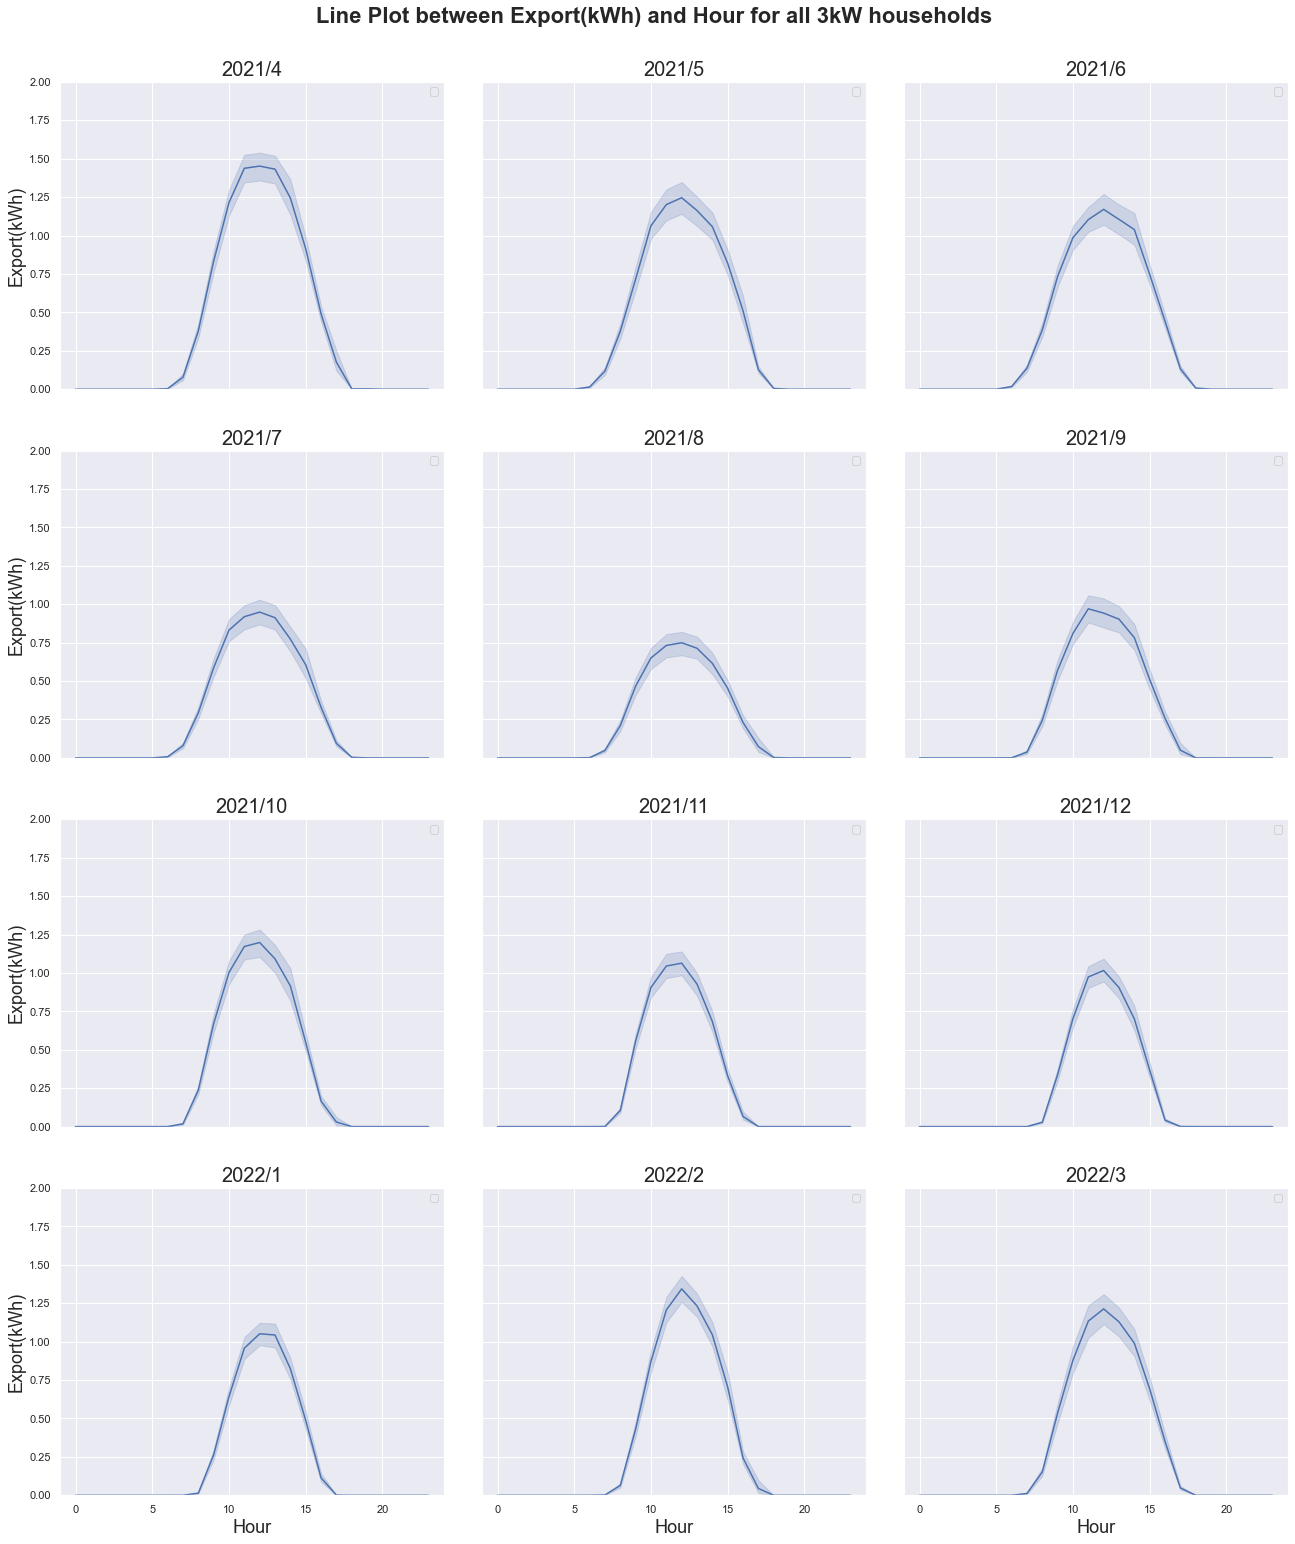

In [12]:
# Graph #
data_x = '시간'
data_y = '잉여전력량(kWh)'
x_label = 'Hour'
y_label = 'Export(kWh)'
x_lim1 = -1.0
x_lim2 = 24.0
y_lim1 = 0.0
y_lim2 = 2.0

print('Line Plot 시작')

# 날짜 필터링 : 2021/4 ~ 2022/3
date_list = ['2021/4', '2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3']
    
sns.set(rc={'figure.figsize':(22, 26)})
plt.suptitle(f'Line Plot between {y_label} and {x_label} for all 3kW households',
             y=0.92, fontsize=22, fontweight='bold')
    
for i in range(len(date_list)):
    df_all_hour_use_f = df_all_hour_use[df_all_hour_use.ym == date_list[i]]
        
    if i in [1, 2, 4, 5, 7, 8]: # x,y축 label 제거
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.xlim(x_lim1, x_lim2)
        plt.ylim(y_lim1, y_lim2)
        axp = sns.lineplot(x=data_x, y=data_y, data=df_all_hour_use_f)
        plt.title(f'{date_list[i]}', fontsize=20)
        axp.set(xlabel=None)
        axp.set(ylabel=None)
        axp.axes.xaxis.set_ticklabels([])
        axp.axes.yaxis.set_ticklabels([])
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)
    elif i in [0, 3, 6]: # x축 label만 제거
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.xlim(x_lim1, x_lim2)
        plt.ylim(y_lim1, y_lim2)
        axp = sns.lineplot(x=data_x, y=data_y, data=df_all_hour_use_f)
        plt.title(f'{date_list[i]}', fontsize=20)
        axp.set(xlabel=None)
        plt.ylabel(y_label, fontsize=18)
        axp.axes.xaxis.set_ticklabels([])
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)
    elif i in [10, 11]: # y축 label만 제거
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.xlim(x_lim1, x_lim2)
        plt.ylim(y_lim1, y_lim2)
        axp = sns.lineplot(x=data_x, y=data_y, data=df_all_hour_use_f)
        plt.title(f'{date_list[i]}', fontsize=20)
        plt.xlabel(x_label, fontsize=18)
        axp.set(ylabel=None)
        axp.axes.yaxis.set_ticklabels([])
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)
    else:
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.xlim(x_lim1, x_lim2)
        plt.ylim(y_lim1, y_lim2)
        axp = sns.lineplot(x=data_x, y=data_y, data=df_all_hour_use_f)
        plt.title(f'{date_list[i]}', fontsize=20)
        plt.xlabel(x_label, fontsize=18)
        plt.ylabel(y_label, fontsize=18)
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)

print('Line Plot 종료')

<hr>

### **4. 월별 수전 전력량**
- 태양광 사용 가구
- 태양광 미사용 가구

In [13]:
# Summary Statistics #
# Result Dictionary
result = {}
result['설치가구(A)'] = []
result['미설치가구(B)'] = []
result['A/B'] = []

# Fill Dictionary
date_list = ['2021/4', '2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3']

for i in range(len(date_list)):
    # 1) Year/Month 필터링
    df_all_hour_use_f = df_all_hour_use[df_all_hour_use.ym == date_list[i]]
    df_all_hour_not_f = df_all_hour_not[df_all_hour_not.ym == date_list[i]]
    
    # 2) 값 합산
    use_grid_consum = np.sum(df_all_hour_use_f['수전전력량(kWh)'])
    not_grid_consum = np.sum(df_all_hour_not_f['수전전력량(kWh)'])
    
    # 3) 평균 구하기
    use_grid_consum_mean = round(use_grid_consum / (len(df_all_hour_use_f.owner.unique())), 1)
    not_grid_consum_mean = round(not_grid_consum / (len(df_all_hour_not_f.owner.unique())), 1)
    calc = round(use_grid_consum_mean / not_grid_consum_mean, 2)
    
    # 4) 값 넣기
    result['설치가구(A)'].append(use_grid_consum_mean)
    result['미설치가구(B)'].append(not_grid_consum_mean)
    result['A/B'].append(calc)
    
result = pd.DataFrame(result)
result.index = date_list
result

,설치가구(A),미설치가구(B),A/B
2021/4,235.0,232.8,1.01
2021/5,231.4,238.2,0.97
2021/6,205.9,232.0,0.89
2021/7,319.1,336.2,0.95
2021/8,335.4,320.2,1.05
2021/9,255.6,267.8,0.95
2021/10,274.1,242.8,1.13
2021/11,313.2,257.7,1.22
2021/12,347.4,291.7,1.19
2022/1,395.8,309.9,1.28


In [14]:
# 태양광 설치 가구 : 시간대별 수전 전력량 비교 #
# Result Dictionary
result = {}
result['2021/4'] = []
result['2021/5'] = []
result['2021/6'] = []
result['2021/7'] = []
result['2021/8'] = []
result['2021/9'] = []
result['2021/10'] = []
result['2021/11'] = []
result['2021/12'] = []
result['2022/1'] = []
result['2022/2'] = []
result['2022/3'] = []

# Fill Dictionary
date_list = ['2021/4', '2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3']
hour_list = ['0~1', '1~2', '2~3', '3~4', '4~5', '5~6', '6~7', '7~8', '8~9', '9~10',
             '10~11', '11~12', '12~13', '13~14', '14~15', '15~16', '16~17', '17~18',
             '18~19', '19~20', '20~21', '21~22', '22~23', '23~24']

for i in range(len(date_list)):
    # 1) Year/Month 필터링
    df_all_hour_use_yd = df_all_hour_use[df_all_hour_use.ym == date_list[i]]
    
    for j in range(0, 23+1):
        df_all_hour_use_f = df_all_hour_use_yd[df_all_hour_use_yd['시간'] == j]
        
        # 2) 값 합산
        use_grid_consum = np.sum(df_all_hour_use_f['수전전력량(kWh)'])
        
        # 3) 평균 구하기
        use_grid_consum_mean = round(use_grid_consum / (len(df_all_hour_use_f.owner.unique())), 1)
        
        # 4) 값 넣기
        result[f'{date_list[i]}'].append(use_grid_consum_mean)
    
result = pd.DataFrame(result)
result.index = hour_list
result

,2021/4,2021/5,2021/6,2021/7,2021/8,2021/9,2021/10,2021/11,2021/12,2022/1,2022/2,2022/3
0~1,15.3,14.3,13.1,16.8,17.5,14.4,15.8,17.0,17.6,20.2,16.6,16.5
1~2,14.0,13.0,12.2,15.2,16.8,13.3,14.4,15.4,16.5,18.0,15.3,14.9
2~3,13.1,11.9,10.9,13.3,14.6,12.5,13.6,14.0,15.0,17.6,14.3,14.0
3~4,13.1,11.9,10.8,12.8,13.8,11.6,12.7,13.1,14.1,17.0,13.5,13.1
4~5,12.2,10.9,9.9,12.5,12.9,11.1,12.5,13.3,14.3,17.3,13.9,13.1
5~6,12.5,11.9,9.7,12.5,13.3,11.1,12.4,13.5,14.2,16.6,13.7,13.1
6~7,11.5,10.4,8.4,11.6,12.7,12.9,13.0,15.1,16.5,17.9,13.9,14.0
7~8,10.0,8.5,7.0,9.4,10.0,10.8,12.5,16.3,20.0,21.0,16.9,15.4
8~9,5.0,6.7,4.1,7.5,9.5,6.3,7.2,10.3,16.3,19.3,12.5,9.7
9~10,2.0,3.6,2.6,3.5,6.3,3.9,3.4,4.5,8.0,9.1,6.8,4.5


In [15]:
# 태양광 미설치 가구 : 시간대별 수전 전력량 비교 #
# Result Dictionary
result = {}
result['2021/4'] = []
result['2021/5'] = []
result['2021/6'] = []
result['2021/7'] = []
result['2021/8'] = []
result['2021/9'] = []
result['2021/10'] = []
result['2021/11'] = []
result['2021/12'] = []
result['2022/1'] = []
result['2022/2'] = []
result['2022/3'] = []

# Fill Dictionary
date_list = ['2021/4', '2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3']
hour_list = ['0~1', '1~2', '2~3', '3~4', '4~5', '5~6', '6~7', '7~8', '8~9', '9~10',
             '10~11', '11~12', '12~13', '13~14', '14~15', '15~16', '16~17', '17~18',
             '18~19', '19~20', '20~21', '21~22', '22~23', '23~24']

for i in range(len(date_list)):
    # 1) Year/Month 필터링
    df_all_hour_not_yd = df_all_hour_not[df_all_hour_not.ym == date_list[i]]
    
    for j in range(0, 23+1):
        df_all_hour_not_f = df_all_hour_not_yd[df_all_hour_not_yd['시간'] == j]
        
        # 2) 값 합산
        not_grid_consum = np.sum(df_all_hour_not_f['수전전력량(kWh)'])
        
        # 3) 평균 구하기
        not_grid_consum_mean = round(not_grid_consum / (len(df_all_hour_not_f.owner.unique())), 1)
        
        # 4) 값 넣기
        result[f'{date_list[i]}'].append(not_grid_consum_mean)
    
result = pd.DataFrame(result)
result.index = hour_list
result

,2021/4,2021/5,2021/6,2021/7,2021/8,2021/9,2021/10,2021/11,2021/12,2022/1,2022/2,2022/3
0~1,9.7,9.6,11.2,13.5,13.5,11.6,10.0,10.7,12.1,12.5,11.1,10.8
1~2,8.9,8.9,9.6,12.5,11.9,10.0,9.4,10.1,11.2,11.4,10.4,9.7
2~3,8.9,8.3,8.7,11.1,10.6,9.3,8.8,9.6,10.8,11.1,10.0,9.6
3~4,7.9,8.0,8.7,10.2,9.7,8.9,9.1,9.3,10.4,10.7,10.0,9.3
4~5,8.1,8.0,8.0,9.3,9.4,8.5,8.2,9.2,10.4,10.5,10.4,9.3
5~6,7.7,8.6,8.0,9.1,9.1,8.5,8.8,9.0,10.8,10.2,10.0,9.4
6~7,9.1,9.2,8.9,11.4,10.1,9.5,9.5,9.7,11.2,11.7,10.7,11.2
7~8,11.7,11.3,11.0,13.6,12.7,11.7,11.9,11.2,12.3,13.6,13.5,11.7
8~9,9.2,9.8,9.8,11.9,12.1,11.2,9.5,11.0,11.4,13.0,13.2,10.4
9~10,8.6,8.9,9.5,11.8,11.1,10.7,8.8,8.8,11.2,12.5,11.7,9.9


Line Plot 시작
Line Plot 종료


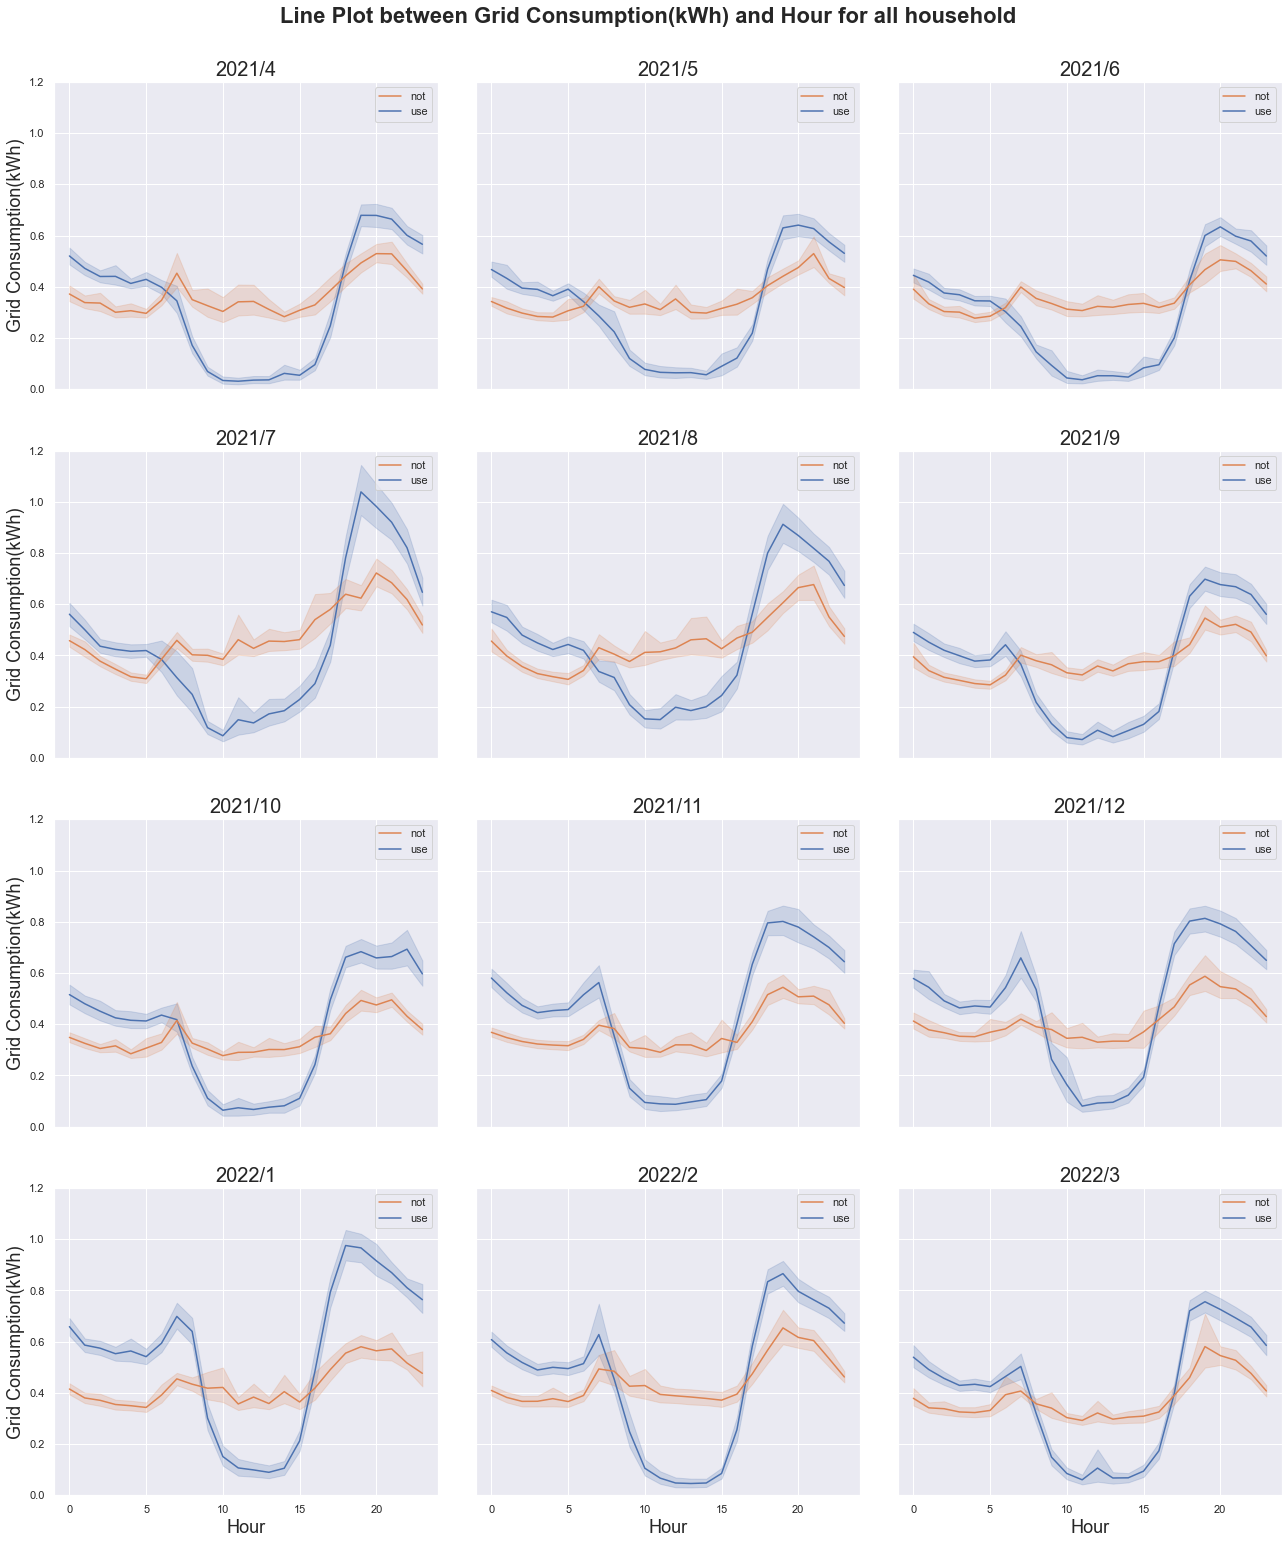

In [16]:
# Graph #
data_x = '시간'
data_y = '수전전력량(kWh)'
x_label = 'Hour'
y_label = 'Grid Consumption(kWh)'
x_lim1 = -1.0
x_lim2 = 24.0
y_lim1 = 0.0
y_lim2 = 1.2

print('Line Plot 시작')

# 날짜 필터링 : 2021/4 ~ 2022/3
date_list = ['2021/4', '2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3']
    
sns.set(rc={'figure.figsize':(22, 26)})
plt.suptitle(f'Line Plot between {y_label} and {x_label} for all household',
             y=0.92, fontsize=22, fontweight='bold')
    
for i in range(len(date_list)):
    df_all_filter = df_all_hour[df_all_hour.ym == date_list[i]]
        
    if i in [1, 2, 4, 5, 7, 8]: # x,y축 label 제거
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.xlim(x_lim1, x_lim2)
        plt.ylim(y_lim1, y_lim2)
        axp = sns.lineplot(x=data_x, y=data_y, hue='type', data=df_all_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        axp.set(xlabel=None)
        axp.set(ylabel=None)
        axp.axes.xaxis.set_ticklabels([])
        axp.axes.yaxis.set_ticklabels([])
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)
    elif i in [0, 3, 6]: # x축 label만 제거
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.xlim(x_lim1, x_lim2)
        plt.ylim(y_lim1, y_lim2)
        axp = sns.lineplot(x=data_x, y=data_y, hue='type', data=df_all_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        axp.set(xlabel=None)
        plt.ylabel(y_label, fontsize=18)
        axp.axes.xaxis.set_ticklabels([])
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)
    elif i in [10, 11]: # y축 label만 제거
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.xlim(x_lim1, x_lim2)
        plt.ylim(y_lim1, y_lim2)
        axp = sns.lineplot(x=data_x, y=data_y, hue='type', data=df_all_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        plt.xlabel(x_label, fontsize=18)
        axp.set(ylabel=None)
        axp.axes.yaxis.set_ticklabels([])
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)
    else:
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.xlim(x_lim1, x_lim2)
        plt.ylim(y_lim1, y_lim2)
        axp = sns.lineplot(x=data_x, y=data_y, hue='type', data=df_all_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        plt.xlabel(x_label, fontsize=18)
        plt.ylabel(y_label, fontsize=18)
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)

print('Line Plot 종료')

<hr>

### **Data 2**
- 태양광 사용 가구 : 주택형태 무관이나, 10가구 모두 단독주택임.
  - 300W : 1가구
  - 3kW : 8가구
  - 18kW : 1가구
- 태양광 미사용 가구 : 주택형태 무관
  - 총 25가구

#### 1) Hour(1시간 단위)

In [17]:
# All Data
root = get_project_root()
folder_root = os.path.join(root, 'data_merge_wt_f')
file_name2 = os.path.join(folder_root, 'all_concat_hour2.xlsx')
df_all_hour2 = pd.read_excel(file_name2)

# Filtering
# (1) Using Solar
df_all_hour_use2 = df_all_hour2[df_all_hour2.type == 'use']

# (2) Not Using Solar
df_all_hour_not2 = df_all_hour2[df_all_hour2.type == 'not']

In [18]:
df_all_hour2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263703 entries, 0 to 263702
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   가구번호                    263703 non-null  int64  
 1   연도                      263703 non-null  int64  
 2   월                       263703 non-null  int64  
 3   일                       263703 non-null  int64  
 4   시간                      263703 non-null  int64  
 5   설비용량(kW)                97547 non-null   object 
 6   발전량(kWh)                97547 non-null   float64
 7   전력소비량(kWh)              263703 non-null  float64
 8   수전전력량(kWh)              263703 non-null  float64
 9   잉여전력량(kWh)              97547 non-null   float64
 10  잉여전력량/발전량               47471 non-null   float64
 11  자가소비율                   97546 non-null   float64
 12  자가공급률                   97547 non-null   float64
 13  temperature             263703 non-null  float64
 14  uws_10m             

#### 2) Day(1일 단위)

In [19]:
# All Data
root = get_project_root()
folder_root = os.path.join(root, 'data_merge_wt_f')
file_name2 = os.path.join(folder_root, 'all_concat_day2.xlsx')
df_all_day2 = pd.read_excel(file_name2)

# Filtering
# (1) Using Solar
df_all_day_use2 = df_all_day2[df_all_day2.type == 'use']

# (2) Not Using Solar
df_all_day_not2 = df_all_day2[df_all_day2.type == 'not']

In [20]:
df_all_day2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11352 entries, 0 to 11351
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   가구번호        11352 non-null  int64  
 1   연도          11352 non-null  int64  
 2   월           11352 non-null  int64  
 3   일           11352 non-null  int64  
 4   설비용량(kW)    4150 non-null   object 
 5   발전량(kWh)    4150 non-null   float64
 6   발전시간        4150 non-null   float64
 7   이용률         4150 non-null   float64
 8   전력소비량(kWh)  11352 non-null  float64
 9   수전전력량(kWh)  11352 non-null  float64
 10  잉여전력량(kWh)  4150 non-null   float64
 11  잉여전력량/발전량   4146 non-null   float64
 12  자가소비율       4146 non-null   float64
 13  자가공급률       4150 non-null   float64
 14  type        11352 non-null  object 
 15  owner       11352 non-null  object 
 16  ym          11352 non-null  object 
dtypes: float64(9), int64(4), object(4)
memory usage: 1.5+ MB


<hr>

## **Summary statistics & Graphs**

### **1. SCR(자가소비율)**
- 태양광 사용 가구

In [21]:
# Result Dictionary
result = {}
result['300W'] = []
result['3kW'] = []
result['18kW'] = []

# Fill Dictionary
date_list = ['2021/4', '2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3']

for i in range(len(date_list)):
    # 1) Year/Month 필터링
    df_all_day_use_f = df_all_day_use2[df_all_day_use2.ym == date_list[i]]
    
    # 2) 설비용량 구분
    df_300w = df_all_day_use_f[df_all_day_use_f['설비용량(kW)'] == '300W']
    df_3kw = df_all_day_use_f[df_all_day_use_f['설비용량(kW)'] == '3kW']
    df_18kw = df_all_day_use_f[df_all_day_use_f['설비용량(kW)'] == '18kW']
    
    # 3) 값 합산
    scr_300w = np.sum(df_300w['자가소비율']) / len(df_300w)
    scr_3kw = np.sum(df_3kw['자가소비율']) / len(df_3kw)
    scr_18kw = np.sum(df_18kw['자가소비율']) / len(df_18kw)
    
    # 4) 평균 구하기
    scr_300w_mean = round(scr_300w, 2)
    scr_3kw_mean = round(scr_3kw, 2)
    scr_18kw_mean = round(scr_18kw, 2)
    
    # 5) 값 넣기
    result['300W'].append(scr_300w_mean)
    result['3kW'].append(scr_3kw_mean)
    result['18kW'].append(scr_18kw_mean)
    
result = pd.DataFrame(result)
result.index = date_list
result

,300W,3kW,18kW
2021/4,0.98,0.35,0.09
2021/5,0.98,0.40,0.10
2021/6,0.99,0.41,0.09
2021/7,0.96,0.50,0.12
2021/8,0.99,0.55,0.13
2021/9,0.97,0.47,0.11
2021/10,0.98,0.41,0.09
2021/11,0.97,0.42,0.11
2021/12,0.98,0.45,0.08
2022/1,0.97,0.48,0.08


Line Plot 시작
Line Plot 종료


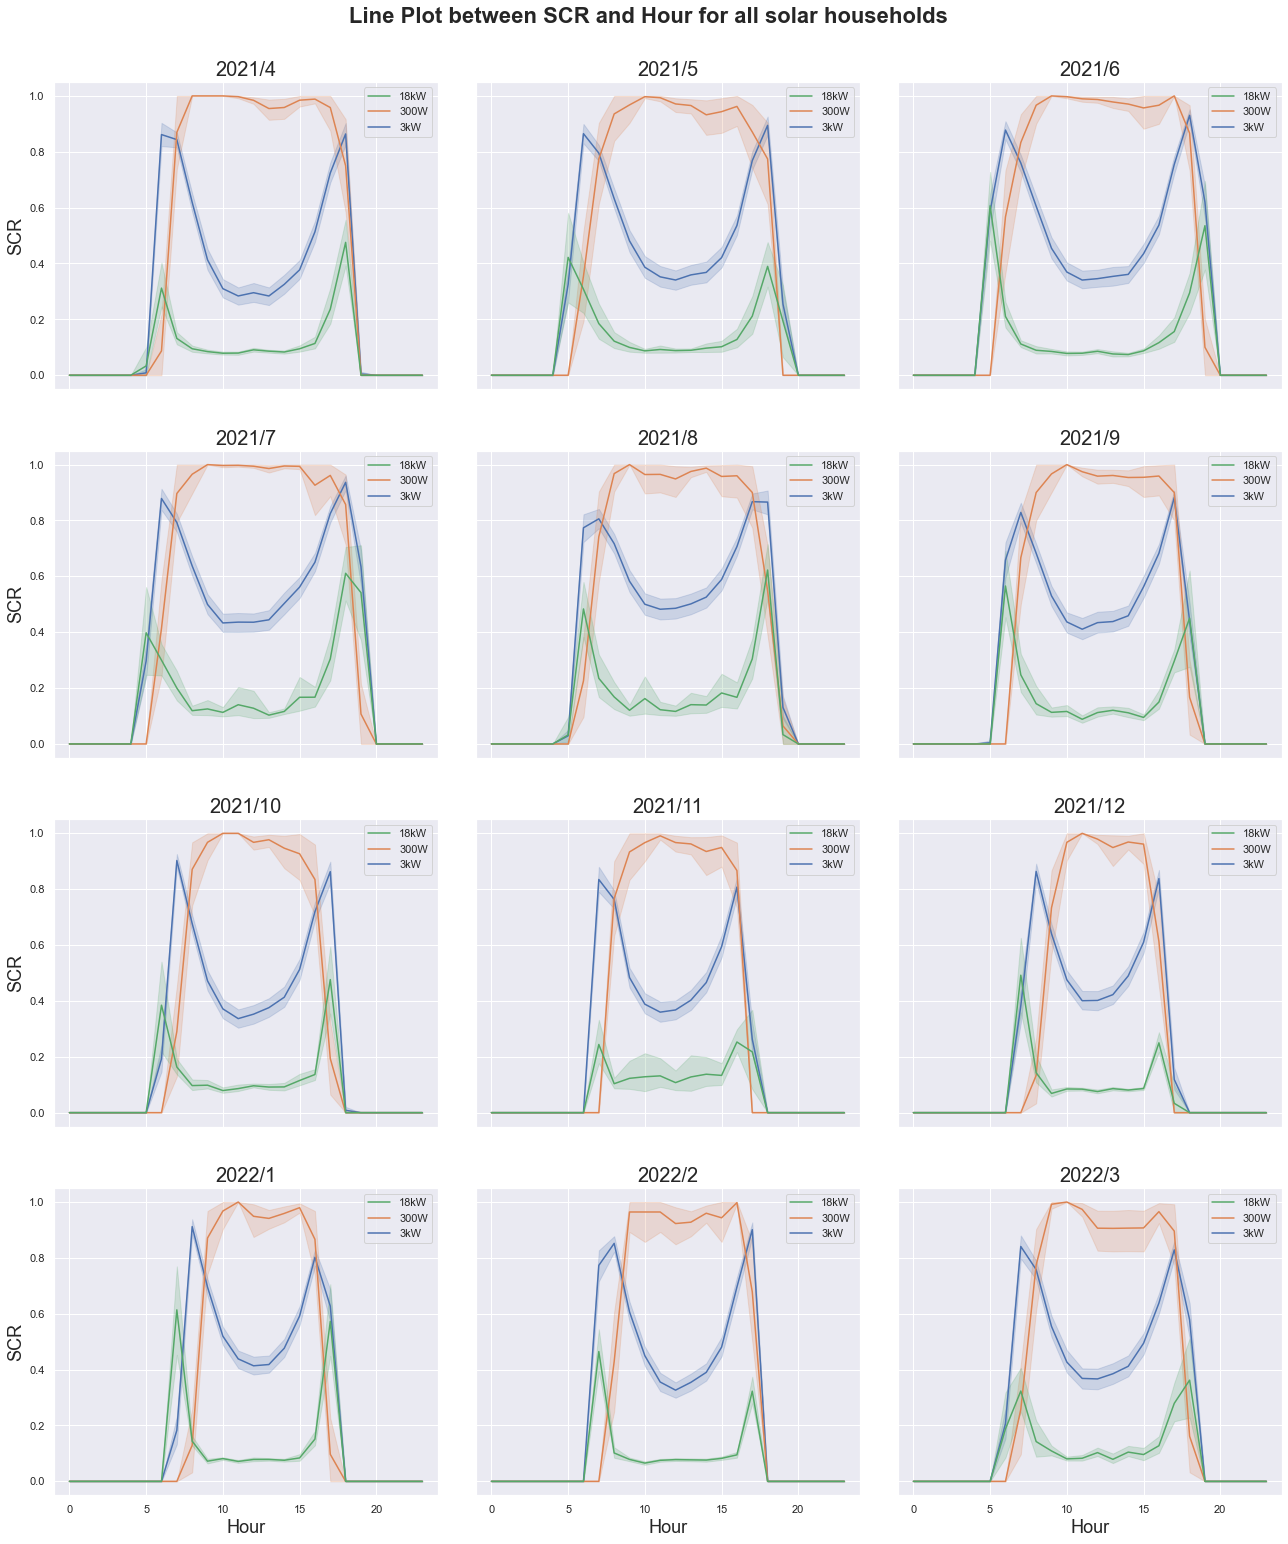

In [22]:
# Graph #
data_x = '시간'
data_y = '자가소비율'
x_label = 'Hour'
y_label = 'SCR'
x_lim1 = -1.0
x_lim2 = 24.0
y_lim1 = -0.05
y_lim2 = 1.05

print('Line Plot 시작')

# 날짜 필터링 : 2021/4 ~ 2022/3
date_list = ['2021/4', '2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3']
    
sns.set(rc={'figure.figsize':(22, 26)})
plt.suptitle(f'Line Plot between {y_label} and {x_label} for all solar households',
             y=0.92, fontsize=22, fontweight='bold')
    
for i in range(len(date_list)):
    df_all_filter = df_all_hour2[df_all_hour2.ym == date_list[i]]
        
    if i in [1, 2, 4, 5, 7, 8]: # x,y축 label 제거
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.xlim(x_lim1, x_lim2)
        plt.ylim(y_lim1, y_lim2)
        axp = sns.lineplot(x=data_x, y=data_y, hue='설비용량(kW)', data=df_all_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        axp.set(xlabel=None)
        axp.set(ylabel=None)
        axp.axes.xaxis.set_ticklabels([])
        axp.axes.yaxis.set_ticklabels([])
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)
    elif i in [0, 3, 6]: # x축 label만 제거
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.xlim(x_lim1, x_lim2)
        plt.ylim(y_lim1, y_lim2)
        axp = sns.lineplot(x=data_x, y=data_y, hue='설비용량(kW)', data=df_all_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        axp.set(xlabel=None)
        plt.ylabel(y_label, fontsize=18)
        axp.axes.xaxis.set_ticklabels([])
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)
    elif i in [10, 11]: # y축 label만 제거
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.xlim(x_lim1, x_lim2)
        plt.ylim(y_lim1, y_lim2)
        axp = sns.lineplot(x=data_x, y=data_y, hue='설비용량(kW)', data=df_all_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        plt.xlabel(x_label, fontsize=18)
        axp.set(ylabel=None)
        axp.axes.yaxis.set_ticklabels([])
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)
    else:
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.xlim(x_lim1, x_lim2)
        plt.ylim(y_lim1, y_lim2)
        axp = sns.lineplot(x=data_x, y=data_y, hue='설비용량(kW)', data=df_all_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        plt.xlabel(x_label, fontsize=18)
        plt.ylabel(y_label, fontsize=18)
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)

print('Line Plot 종료')

<hr>

### **2. SSR(자가공급률)**
- 태양광 사용 가구

In [23]:
# Result Dictionary
result = {}
result['300W'] = []
result['3kW'] = []
result['18kW'] = []

# Fill Dictionary
date_list = ['2021/4', '2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3']

for i in range(len(date_list)):
    # 1) Year/Month 필터링
    df_all_day_use_f = df_all_day_use2[df_all_day_use2.ym == date_list[i]]
    
    # 2) 설비용량 구분
    df_300w = df_all_day_use_f[df_all_day_use_f['설비용량(kW)'] == '300W']
    df_3kw = df_all_day_use_f[df_all_day_use_f['설비용량(kW)'] == '3kW']
    df_18kw = df_all_day_use_f[df_all_day_use_f['설비용량(kW)'] == '18kW']
    
    # 3) 값 합산
    ssr_300w = np.sum(df_300w['자가공급률']) / len(df_300w)
    ssr_3kw = np.sum(df_3kw['자가공급률']) / len(df_3kw)
    ssr_18kw = np.sum(df_18kw['자가공급률']) / len(df_18kw)
    
    # 4) 평균 구하기
    ssr_300w_mean = round(ssr_300w, 2)
    ssr_3kw_mean = round(ssr_3kw, 2)
    ssr_18kw_mean = round(ssr_18kw, 2)
    
    # 5) 값 넣기
    result['300W'].append(ssr_300w_mean)
    result['3kW'].append(ssr_3kw_mean)
    result['18kW'].append(ssr_18kw_mean)
    
result = pd.DataFrame(result)
result.index = date_list
result

,300W,3kW,18kW
2021/4,0.10,0.34,0.80
2021/5,0.08,0.35,0.79
2021/6,0.08,0.39,0.79
2021/7,0.06,0.36,0.73
2021/8,0.06,0.31,0.69
2021/9,0.07,0.32,0.75
2021/10,0.05,0.29,0.76
2021/11,0.04,0.23,0.71
2021/12,0.05,0.23,0.71
2022/1,0.05,0.24,0.72


Line Plot 시작
Line Plot 종료


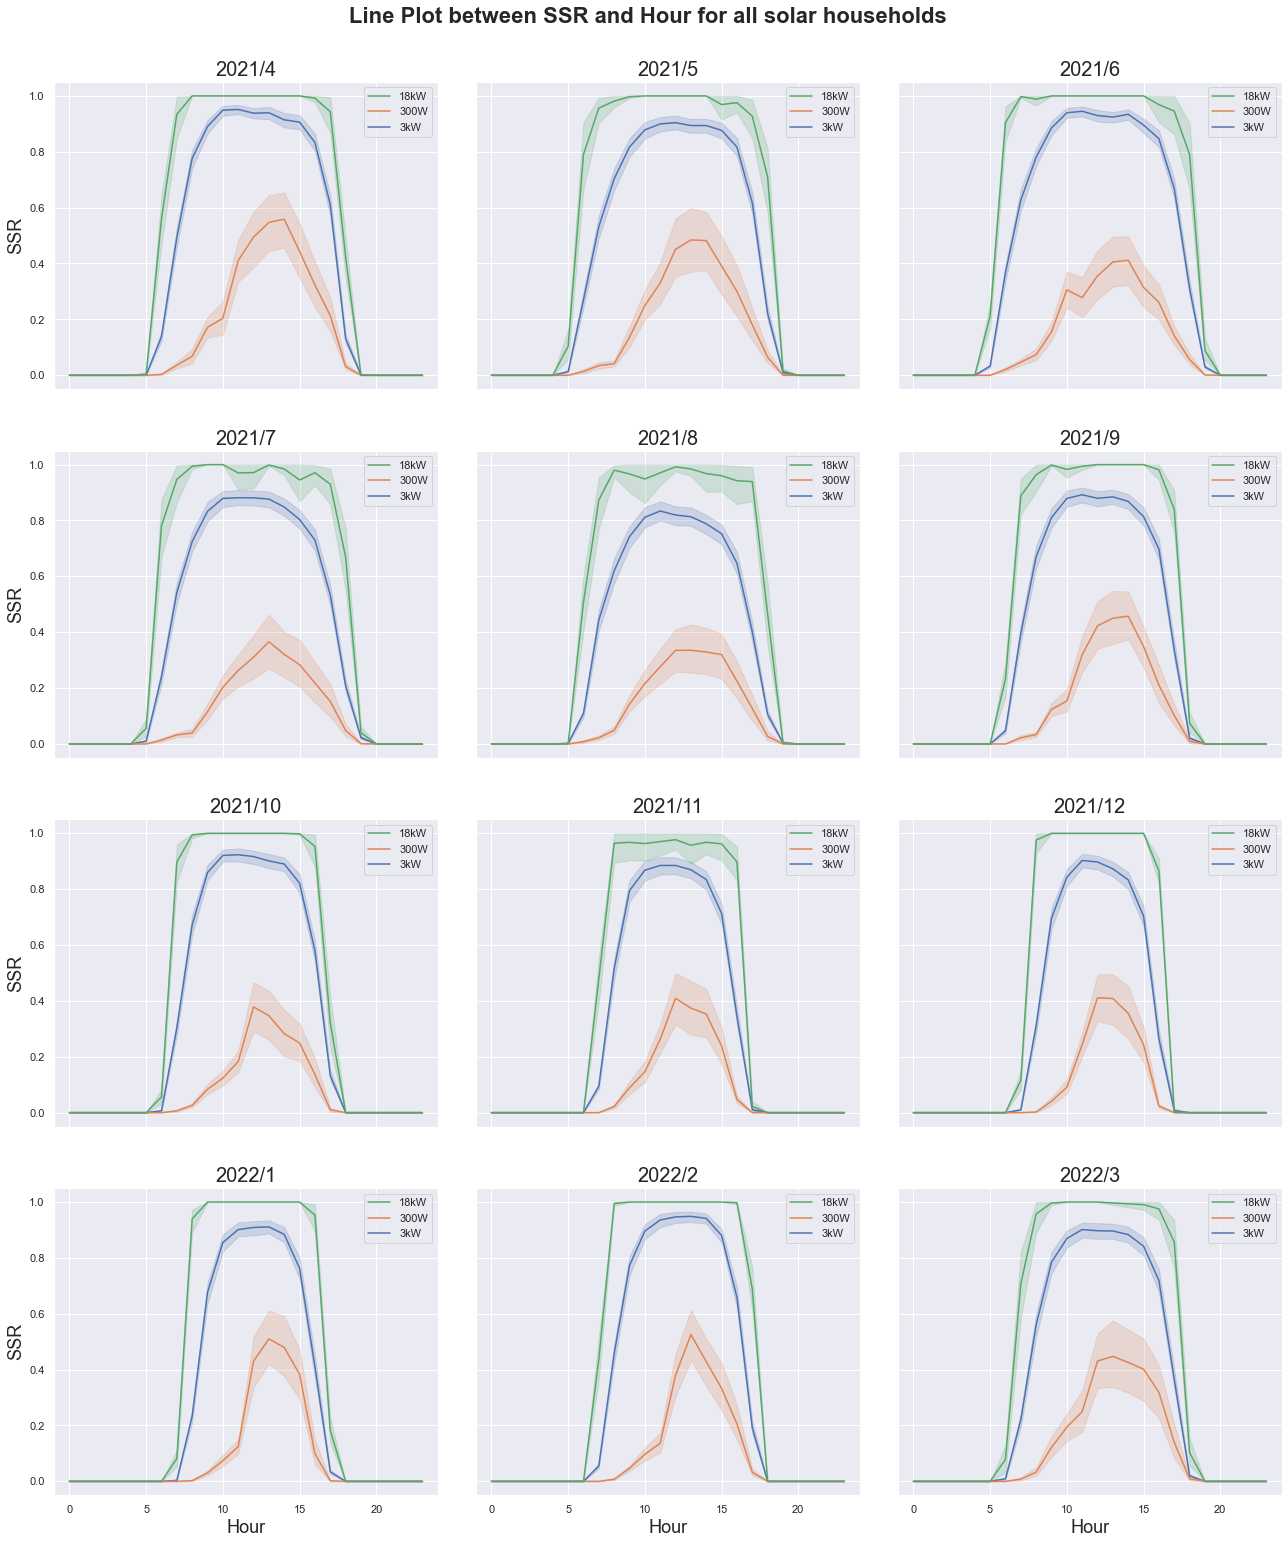

In [24]:
# Graph #
data_x = '시간'
data_y = '자가공급률'
x_label = 'Hour'
y_label = 'SSR'
x_lim1 = -1.0
x_lim2 = 24.0
y_lim1 = -0.05
y_lim2 = 1.05

print('Line Plot 시작')

# 날짜 필터링 : 2021/4 ~ 2022/3
date_list = ['2021/4', '2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3']
    
sns.set(rc={'figure.figsize':(22, 26)})
plt.suptitle(f'Line Plot between {y_label} and {x_label} for all solar households',
             y=0.92, fontsize=22, fontweight='bold')
    
for i in range(len(date_list)):
    df_all_filter = df_all_hour2[df_all_hour2.ym == date_list[i]]
        
    if i in [1, 2, 4, 5, 7, 8]: # x,y축 label 제거
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.xlim(x_lim1, x_lim2)
        plt.ylim(y_lim1, y_lim2)
        axp = sns.lineplot(x=data_x, y=data_y, hue='설비용량(kW)', data=df_all_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        axp.set(xlabel=None)
        axp.set(ylabel=None)
        axp.axes.xaxis.set_ticklabels([])
        axp.axes.yaxis.set_ticklabels([])
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)
    elif i in [0, 3, 6]: # x축 label만 제거
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.xlim(x_lim1, x_lim2)
        plt.ylim(y_lim1, y_lim2)
        axp = sns.lineplot(x=data_x, y=data_y, hue='설비용량(kW)', data=df_all_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        axp.set(xlabel=None)
        plt.ylabel(y_label, fontsize=18)
        axp.axes.xaxis.set_ticklabels([])
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)
    elif i in [10, 11]: # y축 label만 제거
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.xlim(x_lim1, x_lim2)
        plt.ylim(y_lim1, y_lim2)
        axp = sns.lineplot(x=data_x, y=data_y, hue='설비용량(kW)', data=df_all_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        plt.xlabel(x_label, fontsize=18)
        axp.set(ylabel=None)
        axp.axes.yaxis.set_ticklabels([])
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)
    else:
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.xlim(x_lim1, x_lim2)
        plt.ylim(y_lim1, y_lim2)
        axp = sns.lineplot(x=data_x, y=data_y, hue='설비용량(kW)', data=df_all_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        plt.xlabel(x_label, fontsize=18)
        plt.ylabel(y_label, fontsize=18)
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)

print('Line Plot 종료')

<hr>

## **추가 그림 생성**

### **1. 일사량 vs 발전량**
- 태양광 사용 가구(3kW 통합)

Scatter Plot 시작
Scatter Plot 종료


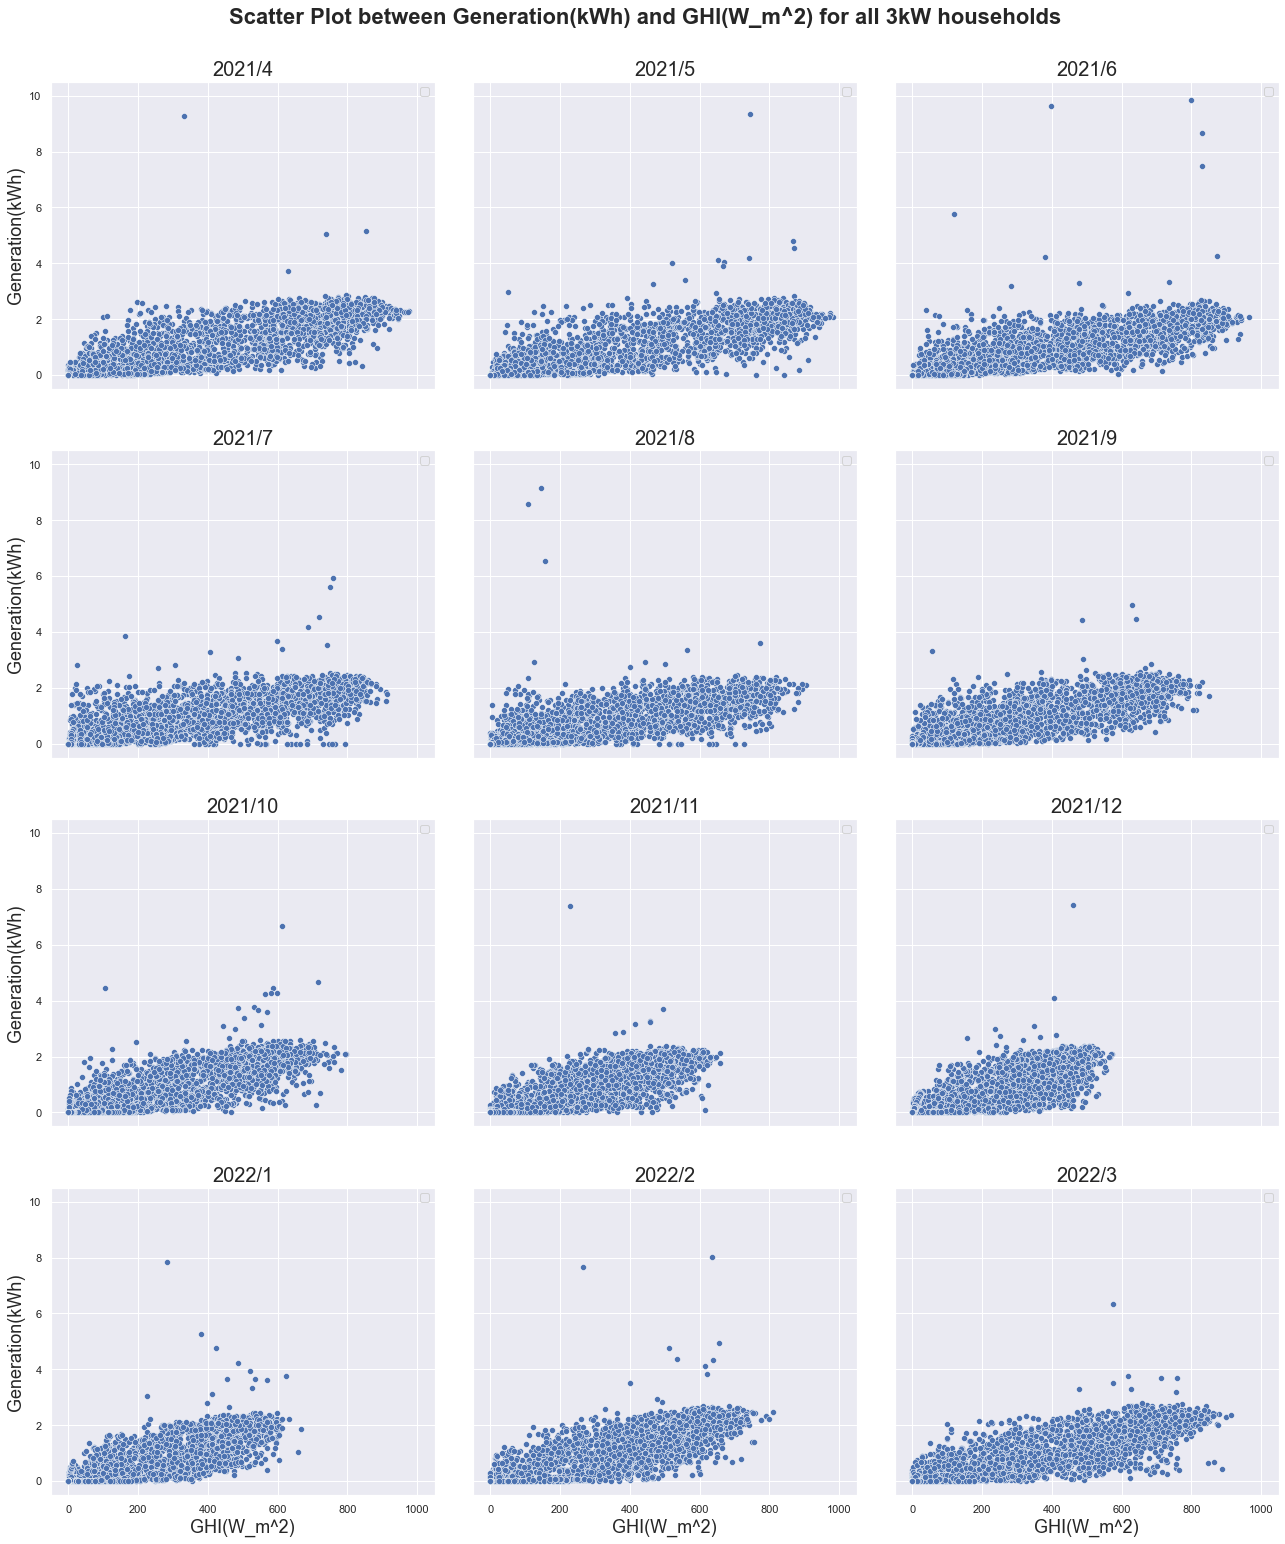

In [32]:
# Graph #
data_x = 'ghi'
data_y = '발전량(kWh)'
x_label = 'GHI(W_m^2)'
y_label = 'Generation(kWh)'
x_lim1 = -50.0
x_lim2 = 1050.0
y_lim1 = -0.5
y_lim2 = 10.5

print('Scatter Plot 시작')

# 날짜 필터링 : 2021/4 ~ 2022/3
date_list = ['2021/4', '2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3']
    
sns.set(rc={'figure.figsize':(22, 26)})
plt.suptitle(f'Scatter Plot between {y_label} and {x_label} for all 3kW households',
             y=0.92, fontsize=22, fontweight='bold')
    
for i in range(len(date_list)):
    df_all_filter = df_all_hour[df_all_hour.ym == date_list[i]]
        
    if i in [1, 2, 4, 5, 7, 8]: # x,y축 label 제거
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.xlim(x_lim1, x_lim2)
        plt.ylim(y_lim1, y_lim2)
        axp = sns.scatterplot(x=data_x, y=data_y, data=df_all_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        axp.set(xlabel=None)
        axp.set(ylabel=None)
        axp.axes.xaxis.set_ticklabels([])
        axp.axes.yaxis.set_ticklabels([])
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)
    elif i in [0, 3, 6]: # x축 label만 제거
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.xlim(x_lim1, x_lim2)
        plt.ylim(y_lim1, y_lim2)
        axp = sns.scatterplot(x=data_x, y=data_y, data=df_all_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        axp.set(xlabel=None)
        plt.ylabel(y_label, fontsize=18)
        axp.axes.xaxis.set_ticklabels([])
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)
    elif i in [10, 11]: # y축 label만 제거
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.xlim(x_lim1, x_lim2)
        plt.ylim(y_lim1, y_lim2)
        axp = sns.scatterplot(x=data_x, y=data_y, data=df_all_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        plt.xlabel(x_label, fontsize=18)
        axp.set(ylabel=None)
        axp.axes.yaxis.set_ticklabels([])
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)
    else:
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.xlim(x_lim1, x_lim2)
        plt.ylim(y_lim1, y_lim2)
        axp = sns.scatterplot(x=data_x, y=data_y, data=df_all_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        plt.xlabel(x_label, fontsize=18)
        plt.ylabel(y_label, fontsize=18)
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)

print('Scatter Plot 종료')

### **2. 온도 vs 전력 소비량**
- 태양광 사용 가구(3kW 통합)

Scatter Plot 시작
Scatter Plot 종료


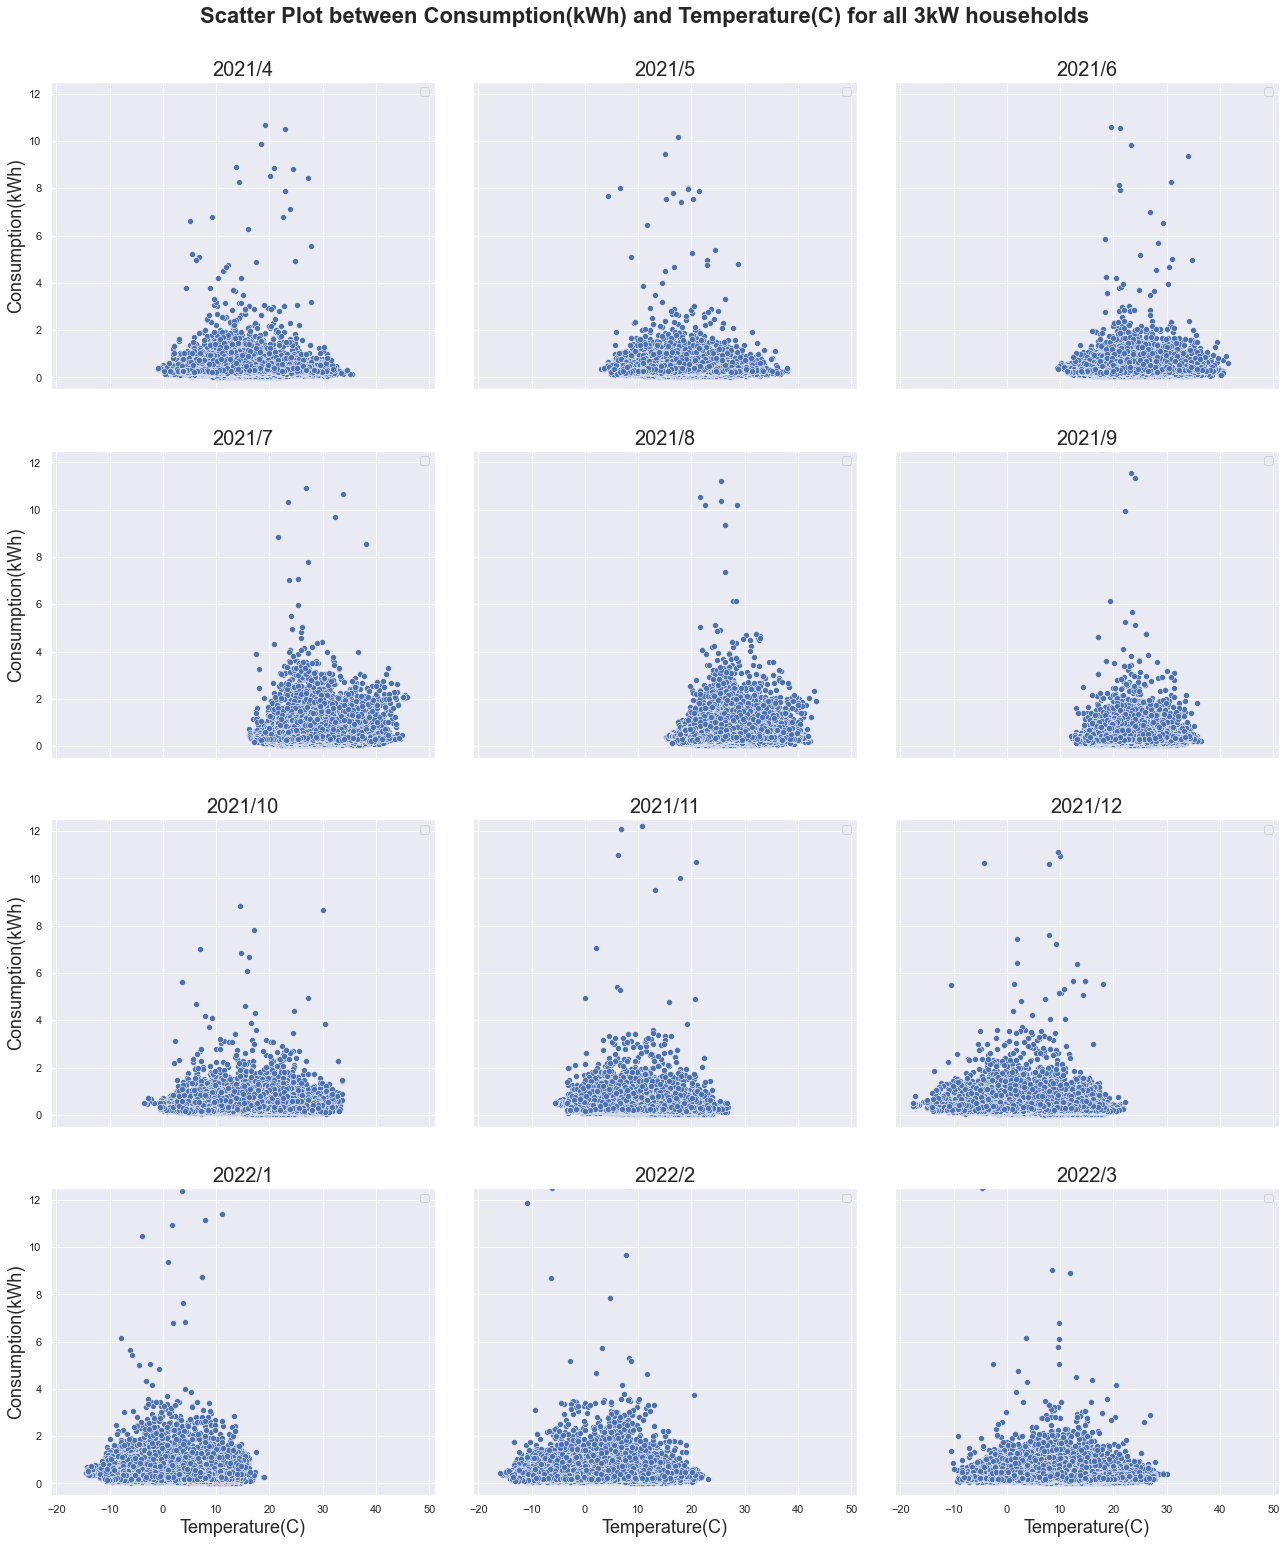

In [40]:
# Graph #
data_x = 'temperature'
data_y = '전력소비량(kWh)'
x_label = 'Temperature(C)'
y_label = 'Consumption(kWh)'
x_lim1 = -21.0
x_lim2 = 51.0
y_lim1 = -0.5
y_lim2 = 12.5

print('Scatter Plot 시작')

# 날짜 필터링 : 2021/4 ~ 2022/3
date_list = ['2021/4', '2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3']
    
sns.set(rc={'figure.figsize':(22, 26)})
plt.suptitle(f'Scatter Plot between {y_label} and {x_label} for all 3kW households',
             y=0.92, fontsize=22, fontweight='bold')
    
for i in range(len(date_list)):
    df_all_filter = df_all_hour[df_all_hour.ym == date_list[i]]
        
    if i in [1, 2, 4, 5, 7, 8]: # x,y축 label 제거
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.xlim(x_lim1, x_lim2)
        plt.ylim(y_lim1, y_lim2)
        axp = sns.scatterplot(x=data_x, y=data_y, data=df_all_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        axp.set(xlabel=None)
        axp.set(ylabel=None)
        axp.axes.xaxis.set_ticklabels([])
        axp.axes.yaxis.set_ticklabels([])
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)
    elif i in [0, 3, 6]: # x축 label만 제거
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.xlim(x_lim1, x_lim2)
        plt.ylim(y_lim1, y_lim2)
        axp = sns.scatterplot(x=data_x, y=data_y, data=df_all_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        axp.set(xlabel=None)
        plt.ylabel(y_label, fontsize=18)
        axp.axes.xaxis.set_ticklabels([])
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)
    elif i in [10, 11]: # y축 label만 제거
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.xlim(x_lim1, x_lim2)
        plt.ylim(y_lim1, y_lim2)
        axp = sns.scatterplot(x=data_x, y=data_y, data=df_all_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        plt.xlabel(x_label, fontsize=18)
        axp.set(ylabel=None)
        axp.axes.yaxis.set_ticklabels([])
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)
    else:
        ax = plt.subplot(4, 3, i+1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.xlim(x_lim1, x_lim2)
        plt.ylim(y_lim1, y_lim2)
        axp = sns.scatterplot(x=data_x, y=data_y, data=df_all_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        plt.xlabel(x_label, fontsize=18)
        plt.ylabel(y_label, fontsize=18)
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)

print('Scatter Plot 종료')